
## Feature engineering content introduction
Common feature projects include:
1. Exception handling:  
    - Remove outliers through box plot (or 3-Sigma) analysis;  
    - BOX-COX conversion (handling biased distribution);  
    - Long tail truncation;  
2. Feature normalization/standardization:  
    - Standardization (converted to standard normal distribution);  
    - Normalization (catch to the [0,1] interval);  
    - For power law distribution, the formula can be used: $log(\frac{1+x}{1+median})$  
3. Data bucketing:  
    - Equal frequency division bucket;  
    - Isometric buckets;  
    - Best-KS buckets (similar to using the Gini index for two classifications);  
    - Chi-square buckets;  
4. Missing value processing:  
    - No processing (for tree models like XGBoost);  
    - Delete (too many missing data);  
    - Interpolation completion, including mean/median/mode/modeling prediction/multiple interpolation/compressed sensing completion/matrix completion, etc.;  
    - Binning, one box of missing values;  
5. Feature structure:  
    - Construct statistical features, report counts, sums, proportions, standard deviations, etc.;  
    - Time characteristics, including relative time and absolute time, holidays, weekends, etc.;  
    - Geographical information, including methods such as binning and distribution coding;  
    - Non-linear transformation, including log/square/root sign, etc.;  
    - Feature combination, feature intersection;  
    - The benevolent see benevolence, and the wise see wisdom.  
6. Feature Screening  
    - Filter: First perform feature selection on the data, and then train the learner. Common methods include Relief/variance selection/correlation coefficient method/chi-square test method/mutual information method;  
    - Wrapper: directly use the performance of the learner to be used as the evaluation criterion for the feature subset. Common methods include LVM (Las Vegas Wrapper);  
    - Embedded : Combining filtering and wrapping, feature selection is automatically performed during the training of the learner, and lasso regression is common;  
7. Dimensionality reduction  
    - PCA/ LDA/ ICA;  
    - Feature selection is also a kind of dimensionality reduction.  

##   特征工程内容介绍 (Chinese)
常见的特征工程包括：
1. 异常处理：
    - 通过箱线图（或 3-Sigma）分析删除异常值；
    - BOX-COX 转换（处理有偏分布）；
    - 长尾截断；
2. 特征归一化/标准化：
    - 标准化（转换为标准正态分布）；
    - 归一化（抓换到 [0,1] 区间）；
    - 针对幂律分布，可以采用公式： $log(\frac{1+x}{1+median})$
3. 数据分桶：
    - 等频分桶；
    - 等距分桶；
    - Best-KS 分桶（类似利用基尼指数进行二分类）；
    - 卡方分桶；
4. 缺失值处理：
    - 不处理（针对类似 XGBoost 等树模型）；
    - 删除（缺失数据太多）；
    - 插值补全，包括均值/中位数/众数/建模预测/多重插补/压缩感知补全/矩阵补全等；
    - 分箱，缺失值一个箱；
5. 特征构造：
    - 构造统计量特征，报告计数、求和、比例、标准差等；
    - 时间特征，包括相对时间和绝对时间，节假日，双休日等；
    - 地理信息，包括分箱，分布编码等方法；
    - 非线性变换，包括 log/ 平方/ 根号等；
    - 特征组合，特征交叉；
    - 仁者见仁，智者见智。
6. 特征筛选
    - 过滤式（filter）：先对数据进行特征选择，然后在训练学习器，常见的方法有 Relief/方差选择发/相关系数法/卡方检验法/互信息法；
    - 包裹式（wrapper）：直接把最终将要使用的学习器的性能作为特征子集的评价准则，常见方法有 LVM（Las Vegas Wrapper） ；
    - 嵌入式（embedding）：结合过滤式和包裹式，学习器训练过程中自动进行了特征选择，常见的有 lasso 回归；
7. 降维
    - PCA/ LDA/ ICA；
    - 特征选择也是一种降维。

## 0. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

%matplotlib inline

In [2]:
Train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv('used_car_test_20200313.csv', sep=' ')
print(Train_data.shape)
print(Test_data.shape)

(150000, 31)
(50000, 30)


In [3]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [4]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [5]:
Test_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4',
       'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13',
       'v_14'],
      dtype='object')

## 1. Remove outliers

In [6]:
# Here is an wrapped exception value handling function

def box_plot_outliers(data_ser, box_scale):
    """
    Use box plots to remove outliers
    :param data_ser: receive data with 'pandas.Series' format 
    :param box_scale: box plots scale
    :return:
    """
    iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
    val_low = data_ser.quantile(0.25) - iqr
    val_up = data_ser.quantile(0.75) + iqr
    rule_low = (data_ser < val_low)
    rule_up = (data_ser > val_up)
    return (rule_low, rule_up), (val_low, val_up)


def outliers_proc(data, col_name, scale=3):
    """
    Used to clean abnormal values, by default box_plot (scale=3) is used for cleaning
    :param data: Receive pandas data format
    :param col_name: pandas column name
    :param scale 
    :return:
    """
    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


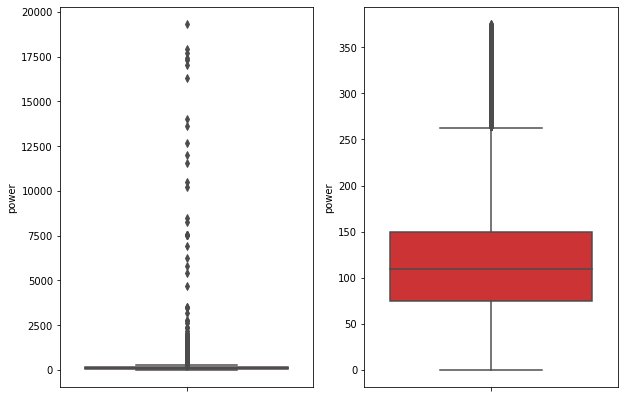

In [7]:
# We can delete some abnormal data, take `power` as an example.
# In practice, you can judge for yourself if you want to delete here
# But note that the data of `test` cannot be deleted

Train_data = outliers_proc(Train_data, 'power', scale=3)

## 2. Feature restructure

In [8]:
# Put the training set and test set together to facilitate the construction of features
Train_data['train']=1
Test_data['train']=0
data = pd.concat([Train_data, Test_data], ignore_index=True)

In [9]:
# usage time: data['creatDate'] - data['regDate']，Reflects the usage time of the car. Generally speaking, the price is inversely proportional to the usage time.
# But note that there is a time error format in the data, so we need the parameter errors='coerce'
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

In [10]:
# Looking at the empty data, there is a problem with the time of 15k samples. We can choose to delete or leave it.
# But it is not recommended to delete here, because deleting missing data accounts for too much of the total sample size(7.5%).
# We can put it here first, because if we have decision trees like XGBoost, it can handle missing values by itself.
data['used_time'].isnull().sum()

15054

In [11]:
# Extract city information from the postcode,i.e., add prior knowledge
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])
data = data

In [12]:
# Calculate the sales statistics of a brand
# Here to calculate the statistics with the data of `train`
Train_gb = Train_data.groupby("brand")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')

In [13]:
# Data bucketing(discretization):Take power as an example
# At this time, our missing values are also in the bucket,
# There are many reasons for bucketing(Discretization)
# 1. After the discretization, the sparse vector inner product multiplication operation speed is faster, and the calculation results are also convenient to store and easy to expand;
# 2. The discrete features are more robust to outliers. If age>30 is 1, otherwise it is 0, it will not cause much interference to the model for the age of 200;
# 3. LR is a generalized linear model with limited expressive power. After discretization, each variable has a separate weight. This is equivalent to the introduction of nonlinearity, which can improve the expression ability of the model and increase the fitting;
# 4. After the discrete features, feature crossover can be performed to improve expressive ability. We can program M*N variables from M+N variables, and further introduce non-linear shapes to improve expressive ability;
# 5. The model is more stable after the characteristics are discrete. For example, the user age range will not change because the user’s age is one year older.

# Of course, there are many other reasons. LightGBM adds data buckets when improving XGBoost, which enhances the generalization of the model.

bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


In [14]:
# Delete unnecessary data
data = data.drop(['creatDate', 'regDate', 'regionCode'], axis=1)

In [15]:
print(data.shape)
data.columns

(199037, 39)


Index(['SaleID', 'name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox',
       'power', 'kilometer', 'notRepairedDamage', 'seller', 'offerType',
       'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8',
       'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'train', 'used_time',
       'city', 'brand_amount', 'brand_price_max', 'brand_price_median',
       'brand_price_min', 'brand_price_sum', 'brand_price_std',
       'brand_price_average', 'power_bin'],
      dtype='object')

In [16]:
# The current data can actually be used for the tree model, so we export it
data.to_csv('data_for_tree.csv', index=0)

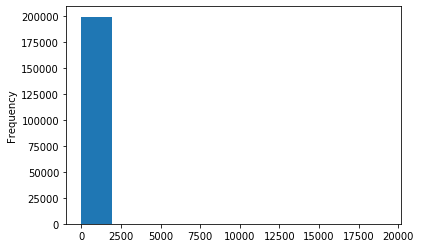

In [17]:
# We can construct another feature for models such as LR NN
# The reason for the separate construction is that different models have different requirements for the data set
# Let's look at the data distribution:
data['power'].plot.hist()

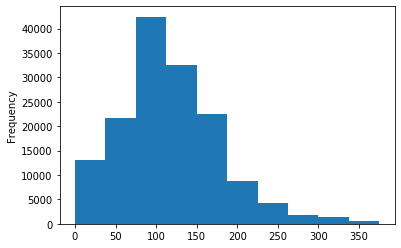

In [18]:
# We have just dealt with outliers in train, but now there is still such a strange distribution because of the outlier power in test.
# So we actually don’t delete the power outliers in the train just now, we can use truncated long tail distribution instead.
Train_data['power'].plot.hist()

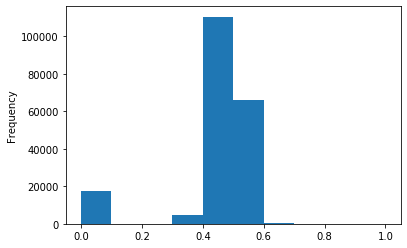

In [19]:
# We take the logarithmic number and normalize it
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['power'] = np.log(data['power'] + 1) 
data['power'] = ((data['power'] - np.min(data['power'])) / (np.max(data['power']) - np.min(data['power'])))
data['power'].plot.hist()

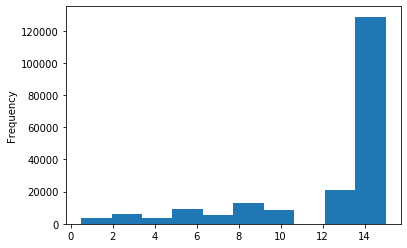

In [20]:
# km is relatively normal, it should have been bucketed before we preprocess the data.
# So we can directly normalize
data['kilometer'].plot.hist()

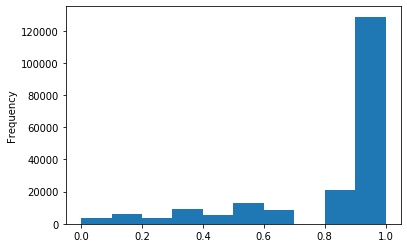

In [21]:
data['kilometer'] = ((data['kilometer'] - np.min(data['kilometer'])) / 
                        (np.max(data['kilometer']) - np.min(data['kilometer'])))
data['kilometer'].plot.hist()

In [22]:
# In addition, there are the statistical features we just constructed:
# 'brand_amount', 'brand_price_average', 'brand_price_max',
# 'brand_price_median', 'brand_price_min', 'brand_price_std',
# 'brand_price_sum'
# Here we just transform them directly without more examples and analysis.
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

data['brand_amount'] = ((data['brand_amount'] - np.min(data['brand_amount'])) / 
                        (np.max(data['brand_amount']) - np.min(data['brand_amount'])))
data['brand_price_average'] = ((data['brand_price_average'] - np.min(data['brand_price_average'])) / 
                               (np.max(data['brand_price_average']) - np.min(data['brand_price_average'])))
data['brand_price_max'] = ((data['brand_price_max'] - np.min(data['brand_price_max'])) / 
                           (np.max(data['brand_price_max']) - np.min(data['brand_price_max'])))
data['brand_price_median'] = ((data['brand_price_median'] - np.min(data['brand_price_median'])) /
                              (np.max(data['brand_price_median']) - np.min(data['brand_price_median'])))
data['brand_price_min'] = ((data['brand_price_min'] - np.min(data['brand_price_min'])) / 
                           (np.max(data['brand_price_min']) - np.min(data['brand_price_min'])))
data['brand_price_std'] = ((data['brand_price_std'] - np.min(data['brand_price_std'])) / 
                           (np.max(data['brand_price_std']) - np.min(data['brand_price_std'])))
data['brand_price_sum'] = ((data['brand_price_sum'] - np.min(data['brand_price_sum'])) / 
                           (np.max(data['brand_price_sum']) - np.min(data['brand_price_sum'])))

In [23]:
# Perform OneEncoder on category features
data = pd.get_dummies(data, columns=['model', 'brand', 'bodyType', 'fuelType',
                                     'gearbox', 'notRepairedDamage', 'power_bin'])

In [24]:
print(data.shape)
data.columns

(199037, 370)


Index(['SaleID', 'name', 'power', 'kilometer', 'seller', 'offerType', 'price',
       'v_0', 'v_1', 'v_2',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=370)

In [25]:
# This data can be used for LR
data.to_csv('data_for_lr.csv', index=0)

## 3. Feature screening

### 1) Filtering

In [26]:
# Correlation analysis
print(data['power'].corr(data['price'], method='spearman'))
print(data['kilometer'].corr(data['price'], method='spearman'))
print(data['brand_amount'].corr(data['price'], method='spearman'))
print(data['brand_price_average'].corr(data['price'], method='spearman'))
print(data['brand_price_max'].corr(data['price'], method='spearman'))
print(data['brand_price_median'].corr(data['price'], method='spearman'))

0.5728285196051496
-0.4082569701616764
0.058156610025581514
0.3834909576057687
0.259066833880992
0.38691042393409447


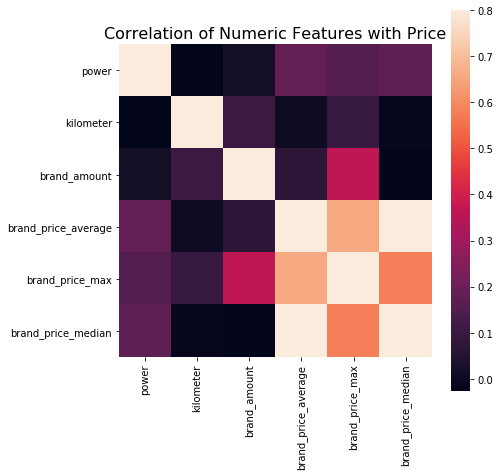

In [27]:
# Of course you can also look at the corr in the picture directly
data_numeric = data[['power', 'kilometer', 'brand_amount', 'brand_price_average', 
                     'brand_price_max', 'brand_price_median']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

### 2) Wrapped

In [28]:
#!pip install mlxtend  # In China mainland it's very slow. You'd better use '.whl' download.

In [29]:
# k_feature is too large to run. There is no server, so I interrupted in advance
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
x = data.drop(['price'], axis=1)
x = x.fillna(0)
y = data['price']
sfs.fit(x, y)
sfs.k_feature_names_ 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Draw it, you can see the marginal benefit
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

### 3) Embedding

In [ ]:
# Lasso regression and decision tree can complete embedded feature selection
# In most cases, embedded features are used for feature selection

## 4. Summary of experience

Feature engineering is the most important part of the competition. In special traditional competitions, everyone’s models may be similar. The effect of tuning is very limited, but the quality of the feature engineering often determines the final Ranking and achievement.

The main purpose of feature engineering is to transform data into features that can better represent potential problems, thereby improving the performance of machine learning. For example, outlier processing is to remove noise, and to fill in missing values, prior knowledge can be added.

Feature construction is also a part of feature engineering, and its purpose is to enhance the expression of data.

Some of the features of the game are anonymous features, which leads us to not know the direct correlation between the features. At this time, we can only process based on features, such as binning, groupby, agg, etc., to perform some feature statistics. In addition, You can perform further log, exp and other transformations on the features, or perform four arithmetic operations on multiple features (such as the use time we calculated above), polynomial combination, etc. and then filter. Because the anonymity of features actually limits a lot of feature processing, of course, sometimes using NN to extract some features will achieve unexpected good results.

For feature engineering that knows the meaning of features (non-anonymous), especially in industrial competitions, more practical features will be constructed based on signal processing, frequency domain extraction, abundance, skewness, etc. This is the feature that combines background Construction is the same in the recommendation system. Various types of click-through rate statistics, statistics for each time period, and statistics with user attributes, etc., such a feature construction often requires in-depth analysis of the business logic or physical principles behind it, so as to be more Ok, find magic.

Of course, feature engineering is actually combined with the model, which is why LR NN is bucketed and feature normalized, and the processing effect and feature importance of features are often verified by models.

In general, feature engineering is an easy thing to get started but very difficult to master.
 

特征工程是比赛中最至关重要的的一块，特别的传统的比赛，大家的模型可能都差不多，调参带来的效果增幅是非常有限的，但特征工程的好坏往往会决定了最终的排名和成绩。

特征工程的主要目的还是在于将数据转换为能更好地表示潜在问题的特征，从而提高机器学习的性能。比如，异常值处理是为了去除噪声，填补缺失值可以加入先验知识等。

特征构造也属于特征工程的一部分，其目的是为了增强数据的表达。

有些比赛的特征是匿名特征，这导致我们并不清楚特征相互直接的关联性，这时我们就只有单纯基于特征进行处理，比如装箱，groupby，agg 等这样一些操作进行一些特征统计，此外还可以对特征进行进一步的 log，exp 等变换，或者对多个特征进行四则运算（如上面我们算出的使用时长），多项式组合等然后进行筛选。由于特性的匿名性其实限制了很多对于特征的处理，当然有些时候用 NN 去提取一些特征也会达到意想不到的良好效果。

对于知道特征含义（非匿名）的特征工程，特别是在工业类型比赛中，会基于信号处理，频域提取，丰度，偏度等构建更为有实际意义的特征，这就是结合背景的特征构建，在推荐系统中也是这样的，各种类型点击率统计，各时段统计，加用户属性的统计等等，这样一种特征构建往往要深入分析背后的业务逻辑或者说物理原理，从而才能更好的找到 magic。

当然特征工程其实是和模型结合在一起的，这就是为什么要为 LR NN 做分桶和特征归一化的原因，而对于特征的处理效果和特征重要性等往往要通过模型来验证。

总的来说，特征工程是一个入门简单，但想精通非常难的一件事。

## Reference
https://www.zhihu.com/people/is-aze

The blogger provided many useful Chinese materials. 